# Latent Dirichlet Allocation
Michael Fitzke, 2016

In [1]:
%pylab inline
import numpy 
import matplotlib.pylab as plt 

Populating the interactive namespace from numpy and matplotlib


Latent Dirichlet Allocation (LDA) is a Generative Bayesian Model or Graphical Model. That means the observable data is thought of to be generated by some hidden variables. 

In [2]:
# We have to set some hyper-parameters first

# Number of Topics: 
K = 3
#prior weight of topic k in a document
alpha = np.array([0.1, 0.1, 0.1])
# prior weight of word w in a topic ( we assume only 8 "Words" 1, 2, 3, 4, 5, 6, 7, 8)
beta = np.array([0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15])

### Step 1
In LDA documents are seen as bags-of-words which are generated by the following process: <br />
for $i \in 1 \ldots K$: <br />
choose 

In [3]:
topics = []
for i in range(K):
    topics.append(np.random.dirichlet(beta))

A topic in this scence is nothing more than a **random distribution over words** 
Let's take a look on the first topic:  

In [4]:
topics[0]

array([  6.29377512e-06,   4.96582532e-07,   3.90337742e-01,
         3.21174574e-03,   3.67719614e-01,   1.64631387e-03,
         2.48157913e-06,   2.37075312e-01])

<Container object of 8 artists>

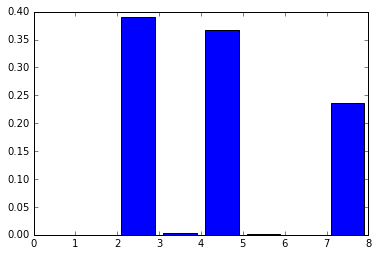

In [5]:
ind = np.arange(8) 
width = 0.1
plt.bar(ind+width, topics[0])

### Step 2
Let's make a Document. <br />
For each Document we choose from another Dirichlet to mix our topics: 


In [6]:
doc1_topic_distribution = np.random.dirichlet(alpha)

Let's check this out, too: 

In [7]:
doc1_topic_distribution

array([  7.81846425e-03,   9.91543190e-01,   6.38345915e-04])

Now, for each word $N_i$ in our Document, we choose a topic from a multinomial that is parameterized by our dirichlet: 

In [8]:
top = np.random.multinomial(1, doc1_topic_distribution)

In [9]:
top

array([0, 1, 0])

Then we choose the topic that the multinomial has given us and use our other dirichlet for a multinomial that generates the words: 

In [10]:
this_topic = topics[np.argmax(top)]

In [11]:
word = np.random.multinomial(1, this_topic)

In [12]:
word

array([0, 0, 0, 0, 0, 0, 0, 1])

By this process our first word is:

In [13]:
str(np.argmax(word) + 1)

'8'

The whole process to create a document with length N looks like this: 

In [14]:
N = 30 
my_doc = ""
for i in range(N):
    top = np.random.multinomial(1, doc1_topic_distribution)
    this_topic = topics[np.argmax(top)]
    word = np.random.multinomial(1, this_topic)
    my_doc += str(np.argmax(word) + 1)
    my_doc += " "

In [15]:
my_doc

'4 8 8 8 8 8 8 7 8 8 4 8 8 8 4 8 8 4 8 8 8 8 8 8 8 8 8 4 8 8 '

For each document another random varable is drawn from the dirichlet to model the topic distribution of that document. 